In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from pathlib import Path
from torch import nn
import helper_functions
import os
from PIL import Image

## Loading the data

In [2]:
from torchvision.datasets import ImageFolder
from torchvision import transforms as T
from torch.utils.data import DataLoader


# Normalization and transforming data into tensors
transform = T.Compose([
    T.Resize(size=(224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

DATA_DIR = Path("data")
TEST_DIR = DATA_DIR / "test"
test_data = ImageFolder(root=TEST_DIR,
                        transform=transform,
                        target_transform=None)

class_names = test_data.classes


# Test Dataloader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
MODELS_PATH = Path("models")

## VGG16

Documentation: https://docs.pytorch.org/vision/main/models/generated/torchvision.models.vgg16.html

### VGG 16 Architecture

In [4]:
from torchvision import models

vgg16 = models.vgg16()

# Change VGG16 to output 10 classes
vgg16.classifier[6] = nn.Linear(in_features=4096, out_features=len(class_names))
vgg16 = vgg16.to(device)

In [6]:
WEIGHTS_PATH = MODELS_PATH / "vgg_16" / "weights" / "vgg_16_epoch_15.pth"

state_dict = torch.load(f=WEIGHTS_PATH, map_location=device)
vgg16.load_state_dict(state_dict=state_dict)

<All keys matched successfully>

### Evaluating VGG16

In [7]:
y_preds, y_true = helper_functions.make_predictions(model=vgg16,
                                                    test_data=test_data,
                                                    test_dataloader=test_dataloader,
                                                    device=device)

Making predictions: 100%|██████████| 10/10 [01:00<00:00,  6.05s/it]


#### Confusion Matrix

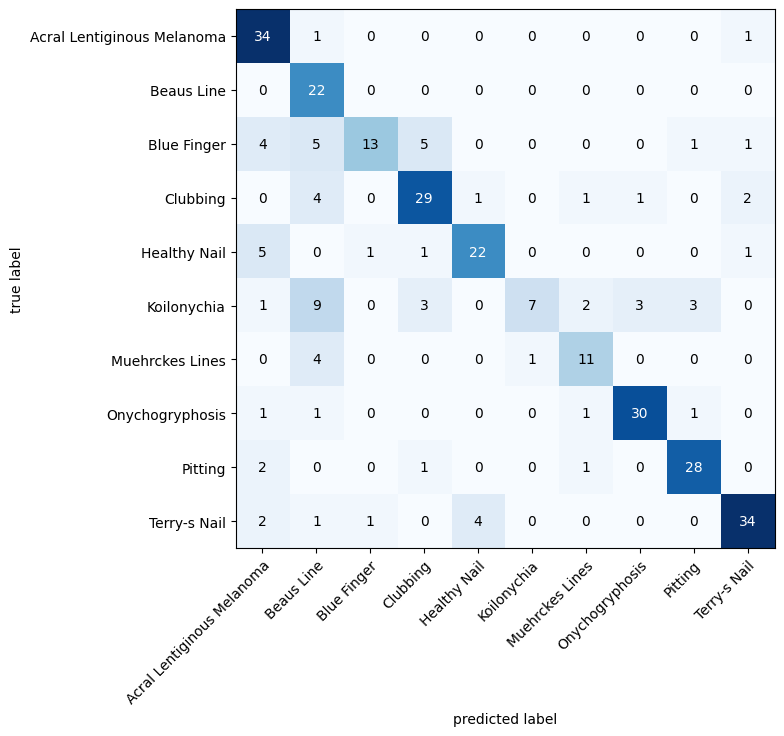

In [43]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

conf_mat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
conf_mat_tensor = conf_mat(y_preds, y_true)

fig, ax = plot_confusion_matrix(conf_mat=conf_mat_tensor.numpy(), class_names=class_names, figsize=(10,7))

#### Classification Report

In [10]:
from sklearn.metrics import classification_report
report = classification_report(y_preds, y_true, target_names=class_names)
print(report)

                            precision    recall  f1-score   support

Acral Lentiginous Melanoma       0.94      0.69      0.80        49
                Beaus Line       1.00      0.47      0.64        47
               Blue Finger       0.45      0.87      0.59        15
                  Clubbing       0.76      0.74      0.75        39
              Healthy Nail       0.73      0.81      0.77        27
               Koilonychia       0.25      0.88      0.39         8
           Muehrckes Lines       0.69      0.69      0.69        16
           Onychogryphosis       0.88      0.88      0.88        34
                   Pitting       0.88      0.85      0.86        33
              Terry-s Nail       0.81      0.87      0.84        39

                  accuracy                           0.75       307
                 macro avg       0.74      0.78      0.72       307
              weighted avg       0.82      0.75      0.76       307



#### Making a single prediction

Predicted class index: 4
Class probabilities:
Acral Lentiginous Melanoma: 0.00
Beaus Line: 0.00
Blue Finger: 0.00
Clubbing: 0.01
Healthy Nail: 0.98
Koilonychia: 0.00
Muehrckes Lines: 0.00
Onychogryphosis: 0.00
Pitting: 0.00
Terry-s Nail: 0.01


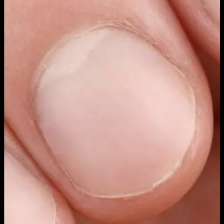

In [53]:
IMAGE_PATH = TEST_DIR / "Healthy Nail" / "105.jpg"

pred_prob, pred_class = helper_functions.make_single_prediction(model=vgg16,
                                                                image_path=IMAGE_PATH,
                                                                transforms=transform,
                                                                device=device)

print(f"Predicted class index: {pred_class}")
print("Class probabilities:")

for i, prob in enumerate(pred_prob):
    print(f"{class_names[i]}: {prob:.2f}")

Image.open(IMAGE_PATH)

## EfficientNetV2S

#### Architecture

In [55]:
from torchvision import models

efficientnet_v2_s = models.vgg16()

# Change VGG16 to output 10 classes
efficientnet_v2_s.classifier[6] = nn.Linear(in_features=4096, out_features=len(class_names))
efficientnet_v2_s= vgg16.to(device)

In [ ]:
WEIGHTS_PATH = MODELS_PATH / "efficient_net_v2_s" / "weights" / "efficient_net_v2_s_5.pth"

state_dict = torch.load(f=WEIGHTS_PATH, map_location=device)
efficientnet_v2_s.load_state_dict(state_dict=state_dict)

RuntimeError: Error(s) in loading state_dict for VGG:
	Missing key(s) in state_dict: "features.0.weight", "features.0.bias", "features.2.weight", "features.2.bias", "features.5.weight", "features.5.bias", "features.7.weight", "features.7.bias", "features.10.weight", "features.10.bias", "features.12.weight", "features.12.bias", "features.14.weight", "features.14.bias", "features.17.weight", "features.17.bias", "features.19.weight", "features.19.bias", "features.21.weight", "features.21.bias", "features.24.weight", "features.24.bias", "features.26.weight", "features.26.bias", "features.28.weight", "features.28.bias", "classifier.0.weight", "classifier.0.bias", "classifier.3.weight", "classifier.3.bias", "classifier.6.weight", "classifier.6.bias". 
	Unexpected key(s) in state_dict: "features.0.0.weight", "features.0.1.weight", "features.0.1.bias", "features.0.1.running_mean", "features.0.1.running_var", "features.0.1.num_batches_tracked", "features.1.0.block.0.0.weight", "features.1.0.block.0.1.weight", "features.1.0.block.0.1.bias", "features.1.0.block.0.1.running_mean", "features.1.0.block.0.1.running_var", "features.1.0.block.0.1.num_batches_tracked", "features.1.1.block.0.0.weight", "features.1.1.block.0.1.weight", "features.1.1.block.0.1.bias", "features.1.1.block.0.1.running_mean", "features.1.1.block.0.1.running_var", "features.1.1.block.0.1.num_batches_tracked", "features.2.0.block.0.0.weight", "features.2.0.block.0.1.weight", "features.2.0.block.0.1.bias", "features.2.0.block.0.1.running_mean", "features.2.0.block.0.1.running_var", "features.2.0.block.0.1.num_batches_tracked", "features.2.0.block.1.0.weight", "features.2.0.block.1.1.weight", "features.2.0.block.1.1.bias", "features.2.0.block.1.1.running_mean", "features.2.0.block.1.1.running_var", "features.2.0.block.1.1.num_batches_tracked", "features.2.1.block.0.0.weight", "features.2.1.block.0.1.weight", "features.2.1.block.0.1.bias", "features.2.1.block.0.1.running_mean", "features.2.1.block.0.1.running_var", "features.2.1.block.0.1.num_batches_tracked", "features.2.1.block.1.0.weight", "features.2.1.block.1.1.weight", "features.2.1.block.1.1.bias", "features.2.1.block.1.1.running_mean", "features.2.1.block.1.1.running_var", "features.2.1.block.1.1.num_batches_tracked", "features.2.2.block.0.0.weight", "features.2.2.block.0.1.weight", "features.2.2.block.0.1.bias", "features.2.2.block.0.1.running_mean", "features.2.2.block.0.1.running_var", "features.2.2.block.0.1.num_batches_tracked", "features.2.2.block.1.0.weight", "features.2.2.block.1.1.weight", "features.2.2.block.1.1.bias", "features.2.2.block.1.1.running_mean", "features.2.2.block.1.1.running_var", "features.2.2.block.1.1.num_batches_tracked", "features.2.3.block.0.0.weight", "features.2.3.block.0.1.weight", "features.2.3.block.0.1.bias", "features.2.3.block.0.1.running_mean", "features.2.3.block.0.1.running_var", "features.2.3.block.0.1.num_batches_tracked", "features.2.3.block.1.0.weight", "features.2.3.block.1.1.weight", "features.2.3.block.1.1.bias", "features.2.3.block.1.1.running_mean", "features.2.3.block.1.1.running_var", "features.2.3.block.1.1.num_batches_tracked", "features.3.0.block.0.0.weight", "features.3.0.block.0.1.weight", "features.3.0.block.0.1.bias", "features.3.0.block.0.1.running_mean", "features.3.0.block.0.1.running_var", "features.3.0.block.0.1.num_batches_tracked", "features.3.0.block.1.0.weight", "features.3.0.block.1.1.weight", "features.3.0.block.1.1.bias", "features.3.0.block.1.1.running_mean", "features.3.0.block.1.1.running_var", "features.3.0.block.1.1.num_batches_tracked", "features.3.1.block.0.0.weight", "features.3.1.block.0.1.weight", "features.3.1.block.0.1.bias", "features.3.1.block.0.1.running_mean", "features.3.1.block.0.1.running_var", "features.3.1.block.0.1.num_batches_tracked", "features.3.1.block.1.0.weight", "features.3.1.block.1.1.weight", "features.3.1.block.1.1.bias", "features.3.1.block.1.1.running_mean", "features.3.1.block.1.1.running_var", "features.3.1.block.1.1.num_batches_tracked", "features.3.2.block.0.0.weight", "features.3.2.block.0.1.weight", "features.3.2.block.0.1.bias", "features.3.2.block.0.1.running_mean", "features.3.2.block.0.1.running_var", "features.3.2.block.0.1.num_batches_tracked", "features.3.2.block.1.0.weight", "features.3.2.block.1.1.weight", "features.3.2.block.1.1.bias", "features.3.2.block.1.1.running_mean", "features.3.2.block.1.1.running_var", "features.3.2.block.1.1.num_batches_tracked", "features.3.3.block.0.0.weight", "features.3.3.block.0.1.weight", "features.3.3.block.0.1.bias", "features.3.3.block.0.1.running_mean", "features.3.3.block.0.1.running_var", "features.3.3.block.0.1.num_batches_tracked", "features.3.3.block.1.0.weight", "features.3.3.block.1.1.weight", "features.3.3.block.1.1.bias", "features.3.3.block.1.1.running_mean", "features.3.3.block.1.1.running_var", "features.3.3.block.1.1.num_batches_tracked", "features.4.0.block.0.0.weight", "features.4.0.block.0.1.weight", "features.4.0.block.0.1.bias", "features.4.0.block.0.1.running_mean", "features.4.0.block.0.1.running_var", "features.4.0.block.0.1.num_batches_tracked", "features.4.0.block.1.0.weight", "features.4.0.block.1.1.weight", "features.4.0.block.1.1.bias", "features.4.0.block.1.1.running_mean", "features.4.0.block.1.1.running_var", "features.4.0.block.1.1.num_batches_tracked", "features.4.0.block.2.fc1.weight", "features.4.0.block.2.fc1.bias", "features.4.0.block.2.fc2.weight", "features.4.0.block.2.fc2.bias", "features.4.0.block.3.0.weight", "features.4.0.block.3.1.weight", "features.4.0.block.3.1.bias", "features.4.0.block.3.1.running_mean", "features.4.0.block.3.1.running_var", "features.4.0.block.3.1.num_batches_tracked", "features.4.1.block.0.0.weight", "features.4.1.block.0.1.weight", "features.4.1.block.0.1.bias", "features.4.1.block.0.1.running_mean", "features.4.1.block.0.1.running_var", "features.4.1.block.0.1.num_batches_tracked", "features.4.1.block.1.0.weight", "features.4.1.block.1.1.weight", "features.4.1.block.1.1.bias", "features.4.1.block.1.1.running_mean", "features.4.1.block.1.1.running_var", "features.4.1.block.1.1.num_batches_tracked", "features.4.1.block.2.fc1.weight", "features.4.1.block.2.fc1.bias", "features.4.1.block.2.fc2.weight", "features.4.1.block.2.fc2.bias", "features.4.1.block.3.0.weight", "features.4.1.block.3.1.weight", "features.4.1.block.3.1.bias", "features.4.1.block.3.1.running_mean", "features.4.1.block.3.1.running_var", "features.4.1.block.3.1.num_batches_tracked", "features.4.2.block.0.0.weight", "features.4.2.block.0.1.weight", "features.4.2.block.0.1.bias", "features.4.2.block.0.1.running_mean", "features.4.2.block.0.1.running_var", "features.4.2.block.0.1.num_batches_tracked", "features.4.2.block.1.0.weight", "features.4.2.block.1.1.weight", "features.4.2.block.1.1.bias", "features.4.2.block.1.1.running_mean", "features.4.2.block.1.1.running_var", "features.4.2.block.1.1.num_batches_tracked", "features.4.2.block.2.fc1.weight", "features.4.2.block.2.fc1.bias", "features.4.2.block.2.fc2.weight", "features.4.2.block.2.fc2.bias", "features.4.2.block.3.0.weight", "features.4.2.block.3.1.weight", "features.4.2.block.3.1.bias", "features.4.2.block.3.1.running_mean", "features.4.2.block.3.1.running_var", "features.4.2.block.3.1.num_batches_tracked", "features.4.3.block.0.0.weight", "features.4.3.block.0.1.weight", "features.4.3.block.0.1.bias", "features.4.3.block.0.1.running_mean", "features.4.3.block.0.1.running_var", "features.4.3.block.0.1.num_batches_tracked", "features.4.3.block.1.0.weight", "features.4.3.block.1.1.weight", "features.4.3.block.1.1.bias", "features.4.3.block.1.1.running_mean", "features.4.3.block.1.1.running_var", "features.4.3.block.1.1.num_batches_tracked", "features.4.3.block.2.fc1.weight", "features.4.3.block.2.fc1.bias", "features.4.3.block.2.fc2.weight", "features.4.3.block.2.fc2.bias", "features.4.3.block.3.0.weight", "features.4.3.block.3.1.weight", "features.4.3.block.3.1.bias", "features.4.3.block.3.1.running_mean", "features.4.3.block.3.1.running_var", "features.4.3.block.3.1.num_batches_tracked", "features.4.4.block.0.0.weight", "features.4.4.block.0.1.weight", "features.4.4.block.0.1.bias", "features.4.4.block.0.1.running_mean", "features.4.4.block.0.1.running_var", "features.4.4.block.0.1.num_batches_tracked", "features.4.4.block.1.0.weight", "features.4.4.block.1.1.weight", "features.4.4.block.1.1.bias", "features.4.4.block.1.1.running_mean", "features.4.4.block.1.1.running_var", "features.4.4.block.1.1.num_batches_tracked", "features.4.4.block.2.fc1.weight", "features.4.4.block.2.fc1.bias", "features.4.4.block.2.fc2.weight", "features.4.4.block.2.fc2.bias", "features.4.4.block.3.0.weight", "features.4.4.block.3.1.weight", "features.4.4.block.3.1.bias", "features.4.4.block.3.1.running_mean", "features.4.4.block.3.1.running_var", "features.4.4.block.3.1.num_batches_tracked", "features.4.5.block.0.0.weight", "features.4.5.block.0.1.weight", "features.4.5.block.0.1.bias", "features.4.5.block.0.1.running_mean", "features.4.5.block.0.1.running_var", "features.4.5.block.0.1.num_batches_tracked", "features.4.5.block.1.0.weight", "features.4.5.block.1.1.weight", "features.4.5.block.1.1.bias", "features.4.5.block.1.1.running_mean", "features.4.5.block.1.1.running_var", "features.4.5.block.1.1.num_batches_tracked", "features.4.5.block.2.fc1.weight", "features.4.5.block.2.fc1.bias", "features.4.5.block.2.fc2.weight", "features.4.5.block.2.fc2.bias", "features.4.5.block.3.0.weight", "features.4.5.block.3.1.weight", "features.4.5.block.3.1.bias", "features.4.5.block.3.1.running_mean", "features.4.5.block.3.1.running_var", "features.4.5.block.3.1.num_batches_tracked", "features.5.0.block.0.0.weight", "features.5.0.block.0.1.weight", "features.5.0.block.0.1.bias", "features.5.0.block.0.1.running_mean", "features.5.0.block.0.1.running_var", "features.5.0.block.0.1.num_batches_tracked", "features.5.0.block.1.0.weight", "features.5.0.block.1.1.weight", "features.5.0.block.1.1.bias", "features.5.0.block.1.1.running_mean", "features.5.0.block.1.1.running_var", "features.5.0.block.1.1.num_batches_tracked", "features.5.0.block.2.fc1.weight", "features.5.0.block.2.fc1.bias", "features.5.0.block.2.fc2.weight", "features.5.0.block.2.fc2.bias", "features.5.0.block.3.0.weight", "features.5.0.block.3.1.weight", "features.5.0.block.3.1.bias", "features.5.0.block.3.1.running_mean", "features.5.0.block.3.1.running_var", "features.5.0.block.3.1.num_batches_tracked", "features.5.1.block.0.0.weight", "features.5.1.block.0.1.weight", "features.5.1.block.0.1.bias", "features.5.1.block.0.1.running_mean", "features.5.1.block.0.1.running_var", "features.5.1.block.0.1.num_batches_tracked", "features.5.1.block.1.0.weight", "features.5.1.block.1.1.weight", "features.5.1.block.1.1.bias", "features.5.1.block.1.1.running_mean", "features.5.1.block.1.1.running_var", "features.5.1.block.1.1.num_batches_tracked", "features.5.1.block.2.fc1.weight", "features.5.1.block.2.fc1.bias", "features.5.1.block.2.fc2.weight", "features.5.1.block.2.fc2.bias", "features.5.1.block.3.0.weight", "features.5.1.block.3.1.weight", "features.5.1.block.3.1.bias", "features.5.1.block.3.1.running_mean", "features.5.1.block.3.1.running_var", "features.5.1.block.3.1.num_batches_tracked", "features.5.2.block.0.0.weight", "features.5.2.block.0.1.weight", "features.5.2.block.0.1.bias", "features.5.2.block.0.1.running_mean", "features.5.2.block.0.1.running_var", "features.5.2.block.0.1.num_batches_tracked", "features.5.2.block.1.0.weight", "features.5.2.block.1.1.weight", "features.5.2.block.1.1.bias", "features.5.2.block.1.1.running_mean", "features.5.2.block.1.1.running_var", "features.5.2.block.1.1.num_batches_tracked", "features.5.2.block.2.fc1.weight", "features.5.2.block.2.fc1.bias", "features.5.2.block.2.fc2.weight", "features.5.2.block.2.fc2.bias", "features.5.2.block.3.0.weight", "features.5.2.block.3.1.weight", "features.5.2.block.3.1.bias", "features.5.2.block.3.1.running_mean", "features.5.2.block.3.1.running_var", "features.5.2.block.3.1.num_batches_tracked", "features.5.3.block.0.0.weight", "features.5.3.block.0.1.weight", "features.5.3.block.0.1.bias", "features.5.3.block.0.1.running_mean", "features.5.3.block.0.1.running_var", "features.5.3.block.0.1.num_batches_tracked", "features.5.3.block.1.0.weight", "features.5.3.block.1.1.weight", "features.5.3.block.1.1.bias", "features.5.3.block.1.1.running_mean", "features.5.3.block.1.1.running_var", "features.5.3.block.1.1.num_batches_tracked", "features.5.3.block.2.fc1.weight", "features.5.3.block.2.fc1.bias", "features.5.3.block.2.fc2.weight", "features.5.3.block.2.fc2.bias", "features.5.3.block.3.0.weight", "features.5.3.block.3.1.weight", "features.5.3.block.3.1.bias", "features.5.3.block.3.1.running_mean", "features.5.3.block.3.1.running_var", "features.5.3.block.3.1.num_batches_tracked", "features.5.4.block.0.0.weight", "features.5.4.block.0.1.weight", "features.5.4.block.0.1.bias", "features.5.4.block.0.1.running_mean", "features.5.4.block.0.1.running_var", "features.5.4.block.0.1.num_batches_tracked", "features.5.4.block.1.0.weight", "features.5.4.block.1.1.weight", "features.5.4.block.1.1.bias", "features.5.4.block.1.1.running_mean", "features.5.4.block.1.1.running_var", "features.5.4.block.1.1.num_batches_tracked", "features.5.4.block.2.fc1.weight", "features.5.4.block.2.fc1.bias", "features.5.4.block.2.fc2.weight", "features.5.4.block.2.fc2.bias", "features.5.4.block.3.0.weight", "features.5.4.block.3.1.weight", "features.5.4.block.3.1.bias", "features.5.4.block.3.1.running_mean", "features.5.4.block.3.1.running_var", "features.5.4.block.3.1.num_batches_tracked", "features.5.5.block.0.0.weight", "features.5.5.block.0.1.weight", "features.5.5.block.0.1.bias", "features.5.5.block.0.1.running_mean", "features.5.5.block.0.1.running_var", "features.5.5.block.0.1.num_batches_tracked", "features.5.5.block.1.0.weight", "features.5.5.block.1.1.weight", "features.5.5.block.1.1.bias", "features.5.5.block.1.1.running_mean", "features.5.5.block.1.1.running_var", "features.5.5.block.1.1.num_batches_tracked", "features.5.5.block.2.fc1.weight", "features.5.5.block.2.fc1.bias", "features.5.5.block.2.fc2.weight", "features.5.5.block.2.fc2.bias", "features.5.5.block.3.0.weight", "features.5.5.block.3.1.weight", "features.5.5.block.3.1.bias", "features.5.5.block.3.1.running_mean", "features.5.5.block.3.1.running_var", "features.5.5.block.3.1.num_batches_tracked", "features.5.6.block.0.0.weight", "features.5.6.block.0.1.weight", "features.5.6.block.0.1.bias", "features.5.6.block.0.1.running_mean", "features.5.6.block.0.1.running_var", "features.5.6.block.0.1.num_batches_tracked", "features.5.6.block.1.0.weight", "features.5.6.block.1.1.weight", "features.5.6.block.1.1.bias", "features.5.6.block.1.1.running_mean", "features.5.6.block.1.1.running_var", "features.5.6.block.1.1.num_batches_tracked", "features.5.6.block.2.fc1.weight", "features.5.6.block.2.fc1.bias", "features.5.6.block.2.fc2.weight", "features.5.6.block.2.fc2.bias", "features.5.6.block.3.0.weight", "features.5.6.block.3.1.weight", "features.5.6.block.3.1.bias", "features.5.6.block.3.1.running_mean", "features.5.6.block.3.1.running_var", "features.5.6.block.3.1.num_batches_tracked", "features.5.7.block.0.0.weight", "features.5.7.block.0.1.weight", "features.5.7.block.0.1.bias", "features.5.7.block.0.1.running_mean", "features.5.7.block.0.1.running_var", "features.5.7.block.0.1.num_batches_tracked", "features.5.7.block.1.0.weight", "features.5.7.block.1.1.weight", "features.5.7.block.1.1.bias", "features.5.7.block.1.1.running_mean", "features.5.7.block.1.1.running_var", "features.5.7.block.1.1.num_batches_tracked", "features.5.7.block.2.fc1.weight", "features.5.7.block.2.fc1.bias", "features.5.7.block.2.fc2.weight", "features.5.7.block.2.fc2.bias", "features.5.7.block.3.0.weight", "features.5.7.block.3.1.weight", "features.5.7.block.3.1.bias", "features.5.7.block.3.1.running_mean", "features.5.7.block.3.1.running_var", "features.5.7.block.3.1.num_batches_tracked", "features.5.8.block.0.0.weight", "features.5.8.block.0.1.weight", "features.5.8.block.0.1.bias", "features.5.8.block.0.1.running_mean", "features.5.8.block.0.1.running_var", "features.5.8.block.0.1.num_batches_tracked", "features.5.8.block.1.0.weight", "features.5.8.block.1.1.weight", "features.5.8.block.1.1.bias", "features.5.8.block.1.1.running_mean", "features.5.8.block.1.1.running_var", "features.5.8.block.1.1.num_batches_tracked", "features.5.8.block.2.fc1.weight", "features.5.8.block.2.fc1.bias", "features.5.8.block.2.fc2.weight", "features.5.8.block.2.fc2.bias", "features.5.8.block.3.0.weight", "features.5.8.block.3.1.weight", "features.5.8.block.3.1.bias", "features.5.8.block.3.1.running_mean", "features.5.8.block.3.1.running_var", "features.5.8.block.3.1.num_batches_tracked", "features.6.0.block.0.0.weight", "features.6.0.block.0.1.weight", "features.6.0.block.0.1.bias", "features.6.0.block.0.1.running_mean", "features.6.0.block.0.1.running_var", "features.6.0.block.0.1.num_batches_tracked", "features.6.0.block.1.0.weight", "features.6.0.block.1.1.weight", "features.6.0.block.1.1.bias", "features.6.0.block.1.1.running_mean", "features.6.0.block.1.1.running_var", "features.6.0.block.1.1.num_batches_tracked", "features.6.0.block.2.fc1.weight", "features.6.0.block.2.fc1.bias", "features.6.0.block.2.fc2.weight", "features.6.0.block.2.fc2.bias", "features.6.0.block.3.0.weight", "features.6.0.block.3.1.weight", "features.6.0.block.3.1.bias", "features.6.0.block.3.1.running_mean", "features.6.0.block.3.1.running_var", "features.6.0.block.3.1.num_batches_tracked", "features.6.1.block.0.0.weight", "features.6.1.block.0.1.weight", "features.6.1.block.0.1.bias", "features.6.1.block.0.1.running_mean", "features.6.1.block.0.1.running_var", "features.6.1.block.0.1.num_batches_tracked", "features.6.1.block.1.0.weight", "features.6.1.block.1.1.weight", "features.6.1.block.1.1.bias", "features.6.1.block.1.1.running_mean", "features.6.1.block.1.1.running_var", "features.6.1.block.1.1.num_batches_tracked", "features.6.1.block.2.fc1.weight", "features.6.1.block.2.fc1.bias", "features.6.1.block.2.fc2.weight", "features.6.1.block.2.fc2.bias", "features.6.1.block.3.0.weight", "features.6.1.block.3.1.weight", "features.6.1.block.3.1.bias", "features.6.1.block.3.1.running_mean", "features.6.1.block.3.1.running_var", "features.6.1.block.3.1.num_batches_tracked", "features.6.2.block.0.0.weight", "features.6.2.block.0.1.weight", "features.6.2.block.0.1.bias", "features.6.2.block.0.1.running_mean", "features.6.2.block.0.1.running_var", "features.6.2.block.0.1.num_batches_tracked", "features.6.2.block.1.0.weight", "features.6.2.block.1.1.weight", "features.6.2.block.1.1.bias", "features.6.2.block.1.1.running_mean", "features.6.2.block.1.1.running_var", "features.6.2.block.1.1.num_batches_tracked", "features.6.2.block.2.fc1.weight", "features.6.2.block.2.fc1.bias", "features.6.2.block.2.fc2.weight", "features.6.2.block.2.fc2.bias", "features.6.2.block.3.0.weight", "features.6.2.block.3.1.weight", "features.6.2.block.3.1.bias", "features.6.2.block.3.1.running_mean", "features.6.2.block.3.1.running_var", "features.6.2.block.3.1.num_batches_tracked", "features.6.3.block.0.0.weight", "features.6.3.block.0.1.weight", "features.6.3.block.0.1.bias", "features.6.3.block.0.1.running_mean", "features.6.3.block.0.1.running_var", "features.6.3.block.0.1.num_batches_tracked", "features.6.3.block.1.0.weight", "features.6.3.block.1.1.weight", "features.6.3.block.1.1.bias", "features.6.3.block.1.1.running_mean", "features.6.3.block.1.1.running_var", "features.6.3.block.1.1.num_batches_tracked", "features.6.3.block.2.fc1.weight", "features.6.3.block.2.fc1.bias", "features.6.3.block.2.fc2.weight", "features.6.3.block.2.fc2.bias", "features.6.3.block.3.0.weight", "features.6.3.block.3.1.weight", "features.6.3.block.3.1.bias", "features.6.3.block.3.1.running_mean", "features.6.3.block.3.1.running_var", "features.6.3.block.3.1.num_batches_tracked", "features.6.4.block.0.0.weight", "features.6.4.block.0.1.weight", "features.6.4.block.0.1.bias", "features.6.4.block.0.1.running_mean", "features.6.4.block.0.1.running_var", "features.6.4.block.0.1.num_batches_tracked", "features.6.4.block.1.0.weight", "features.6.4.block.1.1.weight", "features.6.4.block.1.1.bias", "features.6.4.block.1.1.running_mean", "features.6.4.block.1.1.running_var", "features.6.4.block.1.1.num_batches_tracked", "features.6.4.block.2.fc1.weight", "features.6.4.block.2.fc1.bias", "features.6.4.block.2.fc2.weight", "features.6.4.block.2.fc2.bias", "features.6.4.block.3.0.weight", "features.6.4.block.3.1.weight", "features.6.4.block.3.1.bias", "features.6.4.block.3.1.running_mean", "features.6.4.block.3.1.running_var", "features.6.4.block.3.1.num_batches_tracked", "features.6.5.block.0.0.weight", "features.6.5.block.0.1.weight", "features.6.5.block.0.1.bias", "features.6.5.block.0.1.running_mean", "features.6.5.block.0.1.running_var", "features.6.5.block.0.1.num_batches_tracked", "features.6.5.block.1.0.weight", "features.6.5.block.1.1.weight", "features.6.5.block.1.1.bias", "features.6.5.block.1.1.running_mean", "features.6.5.block.1.1.running_var", "features.6.5.block.1.1.num_batches_tracked", "features.6.5.block.2.fc1.weight", "features.6.5.block.2.fc1.bias", "features.6.5.block.2.fc2.weight", "features.6.5.block.2.fc2.bias", "features.6.5.block.3.0.weight", "features.6.5.block.3.1.weight", "features.6.5.block.3.1.bias", "features.6.5.block.3.1.running_mean", "features.6.5.block.3.1.running_var", "features.6.5.block.3.1.num_batches_tracked", "features.6.6.block.0.0.weight", "features.6.6.block.0.1.weight", "features.6.6.block.0.1.bias", "features.6.6.block.0.1.running_mean", "features.6.6.block.0.1.running_var", "features.6.6.block.0.1.num_batches_tracked", "features.6.6.block.1.0.weight", "features.6.6.block.1.1.weight", "features.6.6.block.1.1.bias", "features.6.6.block.1.1.running_mean", "features.6.6.block.1.1.running_var", "features.6.6.block.1.1.num_batches_tracked", "features.6.6.block.2.fc1.weight", "features.6.6.block.2.fc1.bias", "features.6.6.block.2.fc2.weight", "features.6.6.block.2.fc2.bias", "features.6.6.block.3.0.weight", "features.6.6.block.3.1.weight", "features.6.6.block.3.1.bias", "features.6.6.block.3.1.running_mean", "features.6.6.block.3.1.running_var", "features.6.6.block.3.1.num_batches_tracked", "features.6.7.block.0.0.weight", "features.6.7.block.0.1.weight", "features.6.7.block.0.1.bias", "features.6.7.block.0.1.running_mean", "features.6.7.block.0.1.running_var", "features.6.7.block.0.1.num_batches_tracked", "features.6.7.block.1.0.weight", "features.6.7.block.1.1.weight", "features.6.7.block.1.1.bias", "features.6.7.block.1.1.running_mean", "features.6.7.block.1.1.running_var", "features.6.7.block.1.1.num_batches_tracked", "features.6.7.block.2.fc1.weight", "features.6.7.block.2.fc1.bias", "features.6.7.block.2.fc2.weight", "features.6.7.block.2.fc2.bias", "features.6.7.block.3.0.weight", "features.6.7.block.3.1.weight", "features.6.7.block.3.1.bias", "features.6.7.block.3.1.running_mean", "features.6.7.block.3.1.running_var", "features.6.7.block.3.1.num_batches_tracked", "features.6.8.block.0.0.weight", "features.6.8.block.0.1.weight", "features.6.8.block.0.1.bias", "features.6.8.block.0.1.running_mean", "features.6.8.block.0.1.running_var", "features.6.8.block.0.1.num_batches_tracked", "features.6.8.block.1.0.weight", "features.6.8.block.1.1.weight", "features.6.8.block.1.1.bias", "features.6.8.block.1.1.running_mean", "features.6.8.block.1.1.running_var", "features.6.8.block.1.1.num_batches_tracked", "features.6.8.block.2.fc1.weight", "features.6.8.block.2.fc1.bias", "features.6.8.block.2.fc2.weight", "features.6.8.block.2.fc2.bias", "features.6.8.block.3.0.weight", "features.6.8.block.3.1.weight", "features.6.8.block.3.1.bias", "features.6.8.block.3.1.running_mean", "features.6.8.block.3.1.running_var", "features.6.8.block.3.1.num_batches_tracked", "features.6.9.block.0.0.weight", "features.6.9.block.0.1.weight", "features.6.9.block.0.1.bias", "features.6.9.block.0.1.running_mean", "features.6.9.block.0.1.running_var", "features.6.9.block.0.1.num_batches_tracked", "features.6.9.block.1.0.weight", "features.6.9.block.1.1.weight", "features.6.9.block.1.1.bias", "features.6.9.block.1.1.running_mean", "features.6.9.block.1.1.running_var", "features.6.9.block.1.1.num_batches_tracked", "features.6.9.block.2.fc1.weight", "features.6.9.block.2.fc1.bias", "features.6.9.block.2.fc2.weight", "features.6.9.block.2.fc2.bias", "features.6.9.block.3.0.weight", "features.6.9.block.3.1.weight", "features.6.9.block.3.1.bias", "features.6.9.block.3.1.running_mean", "features.6.9.block.3.1.running_var", "features.6.9.block.3.1.num_batches_tracked", "features.6.10.block.0.0.weight", "features.6.10.block.0.1.weight", "features.6.10.block.0.1.bias", "features.6.10.block.0.1.running_mean", "features.6.10.block.0.1.running_var", "features.6.10.block.0.1.num_batches_tracked", "features.6.10.block.1.0.weight", "features.6.10.block.1.1.weight", "features.6.10.block.1.1.bias", "features.6.10.block.1.1.running_mean", "features.6.10.block.1.1.running_var", "features.6.10.block.1.1.num_batches_tracked", "features.6.10.block.2.fc1.weight", "features.6.10.block.2.fc1.bias", "features.6.10.block.2.fc2.weight", "features.6.10.block.2.fc2.bias", "features.6.10.block.3.0.weight", "features.6.10.block.3.1.weight", "features.6.10.block.3.1.bias", "features.6.10.block.3.1.running_mean", "features.6.10.block.3.1.running_var", "features.6.10.block.3.1.num_batches_tracked", "features.6.11.block.0.0.weight", "features.6.11.block.0.1.weight", "features.6.11.block.0.1.bias", "features.6.11.block.0.1.running_mean", "features.6.11.block.0.1.running_var", "features.6.11.block.0.1.num_batches_tracked", "features.6.11.block.1.0.weight", "features.6.11.block.1.1.weight", "features.6.11.block.1.1.bias", "features.6.11.block.1.1.running_mean", "features.6.11.block.1.1.running_var", "features.6.11.block.1.1.num_batches_tracked", "features.6.11.block.2.fc1.weight", "features.6.11.block.2.fc1.bias", "features.6.11.block.2.fc2.weight", "features.6.11.block.2.fc2.bias", "features.6.11.block.3.0.weight", "features.6.11.block.3.1.weight", "features.6.11.block.3.1.bias", "features.6.11.block.3.1.running_mean", "features.6.11.block.3.1.running_var", "features.6.11.block.3.1.num_batches_tracked", "features.6.12.block.0.0.weight", "features.6.12.block.0.1.weight", "features.6.12.block.0.1.bias", "features.6.12.block.0.1.running_mean", "features.6.12.block.0.1.running_var", "features.6.12.block.0.1.num_batches_tracked", "features.6.12.block.1.0.weight", "features.6.12.block.1.1.weight", "features.6.12.block.1.1.bias", "features.6.12.block.1.1.running_mean", "features.6.12.block.1.1.running_var", "features.6.12.block.1.1.num_batches_tracked", "features.6.12.block.2.fc1.weight", "features.6.12.block.2.fc1.bias", "features.6.12.block.2.fc2.weight", "features.6.12.block.2.fc2.bias", "features.6.12.block.3.0.weight", "features.6.12.block.3.1.weight", "features.6.12.block.3.1.bias", "features.6.12.block.3.1.running_mean", "features.6.12.block.3.1.running_var", "features.6.12.block.3.1.num_batches_tracked", "features.6.13.block.0.0.weight", "features.6.13.block.0.1.weight", "features.6.13.block.0.1.bias", "features.6.13.block.0.1.running_mean", "features.6.13.block.0.1.running_var", "features.6.13.block.0.1.num_batches_tracked", "features.6.13.block.1.0.weight", "features.6.13.block.1.1.weight", "features.6.13.block.1.1.bias", "features.6.13.block.1.1.running_mean", "features.6.13.block.1.1.running_var", "features.6.13.block.1.1.num_batches_tracked", "features.6.13.block.2.fc1.weight", "features.6.13.block.2.fc1.bias", "features.6.13.block.2.fc2.weight", "features.6.13.block.2.fc2.bias", "features.6.13.block.3.0.weight", "features.6.13.block.3.1.weight", "features.6.13.block.3.1.bias", "features.6.13.block.3.1.running_mean", "features.6.13.block.3.1.running_var", "features.6.13.block.3.1.num_batches_tracked", "features.6.14.block.0.0.weight", "features.6.14.block.0.1.weight", "features.6.14.block.0.1.bias", "features.6.14.block.0.1.running_mean", "features.6.14.block.0.1.running_var", "features.6.14.block.0.1.num_batches_tracked", "features.6.14.block.1.0.weight", "features.6.14.block.1.1.weight", "features.6.14.block.1.1.bias", "features.6.14.block.1.1.running_mean", "features.6.14.block.1.1.running_var", "features.6.14.block.1.1.num_batches_tracked", "features.6.14.block.2.fc1.weight", "features.6.14.block.2.fc1.bias", "features.6.14.block.2.fc2.weight", "features.6.14.block.2.fc2.bias", "features.6.14.block.3.0.weight", "features.6.14.block.3.1.weight", "features.6.14.block.3.1.bias", "features.6.14.block.3.1.running_mean", "features.6.14.block.3.1.running_var", "features.6.14.block.3.1.num_batches_tracked", "features.7.0.weight", "features.7.1.weight", "features.7.1.bias", "features.7.1.running_mean", "features.7.1.running_var", "features.7.1.num_batches_tracked", "classifier.1.weight", "classifier.1.bias". 

### Evaluating VGG16

In [ ]:
y_preds, y_true = helper_functions.make_predictions(model=efficientnet_v2_s,
                                                    test_data=test_data,
                                                    test_dataloader=test_dataloader,
                                                    device=device)

Making predictions: 100%|██████████| 10/10 [01:00<00:00,  6.05s/it]


#### Confusion Matrix

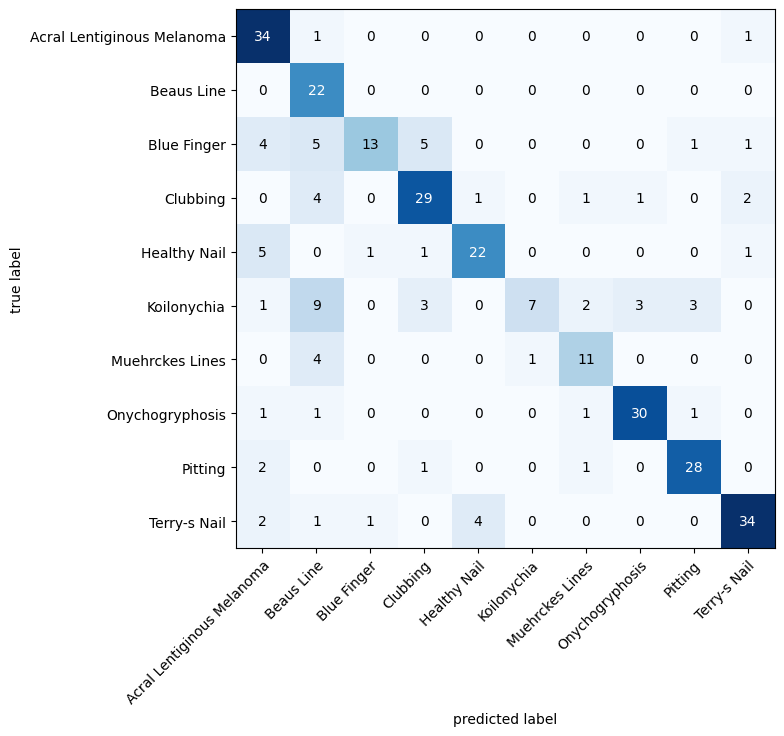

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

conf_mat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
conf_mat_tensor = conf_mat(y_preds, y_true)

fig, ax = plot_confusion_matrix(conf_mat=conf_mat_tensor.numpy(), class_names=class_names, figsize=(10,7))

#### Classification Report

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_preds, y_true, target_names=class_names)
print(report)

                            precision    recall  f1-score   support

Acral Lentiginous Melanoma       0.94      0.69      0.80        49
                Beaus Line       1.00      0.47      0.64        47
               Blue Finger       0.45      0.87      0.59        15
                  Clubbing       0.76      0.74      0.75        39
              Healthy Nail       0.73      0.81      0.77        27
               Koilonychia       0.25      0.88      0.39         8
           Muehrckes Lines       0.69      0.69      0.69        16
           Onychogryphosis       0.88      0.88      0.88        34
                   Pitting       0.88      0.85      0.86        33
              Terry-s Nail       0.81      0.87      0.84        39

                  accuracy                           0.75       307
                 macro avg       0.74      0.78      0.72       307
              weighted avg       0.82      0.75      0.76       307



#### Making a single prediction

Predicted class index: 4
Class probabilities:
Acral Lentiginous Melanoma: 0.00
Beaus Line: 0.00
Blue Finger: 0.00
Clubbing: 0.01
Healthy Nail: 0.98
Koilonychia: 0.00
Muehrckes Lines: 0.00
Onychogryphosis: 0.00
Pitting: 0.00
Terry-s Nail: 0.01


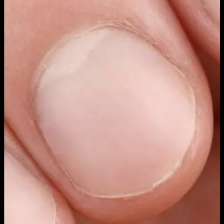

In [ ]:
IMAGE_PATH = TEST_DIR / "Healthy Nail" / "105.jpg"

pred_prob, pred_class = helper_functions.make_single_prediction(model=efficientnet_v2_s,
                                                                image_path=IMAGE_PATH,
                                                                transforms=transform,
                                                                device=device)

print(f"Predicted class index: {pred_class}")
print("Class probabilities:")

for i, prob in enumerate(pred_prob):
    print(f"{class_names[i]}: {prob:.2f}")

Image.open(IMAGE_PATH)